In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import r2_score

C:\Users\Tanuja\Desktop\Jupyter Notebook\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
data = pd.read_csv('Google_Stock_Price_Train.csv',thousands=',')
data

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,7380500
1,1/4/2012,331.27,333.87,329.08,666.45,5749400
2,1/5/2012,329.83,330.75,326.89,657.21,6590300
3,1/6/2012,328.34,328.77,323.68,648.24,5405900
4,1/9/2012,322.04,322.29,309.46,620.76,11688800
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,623400
1254,12/27/2016,790.68,797.86,787.66,791.55,789100
1255,12/28/2016,793.70,794.23,783.20,785.05,1153800
1256,12/29/2016,783.33,785.93,778.92,782.79,744300


Text(0, 0.5, 'Stock Volume')

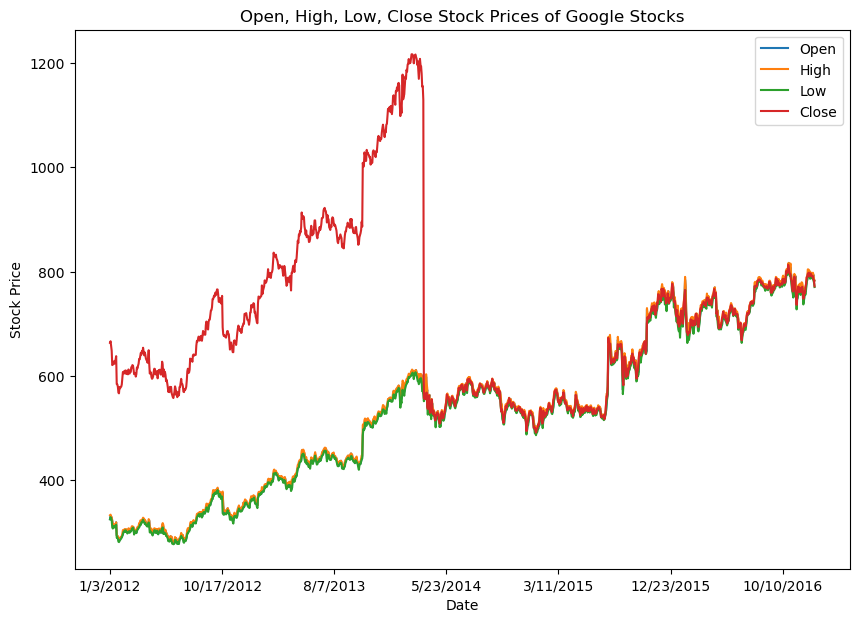

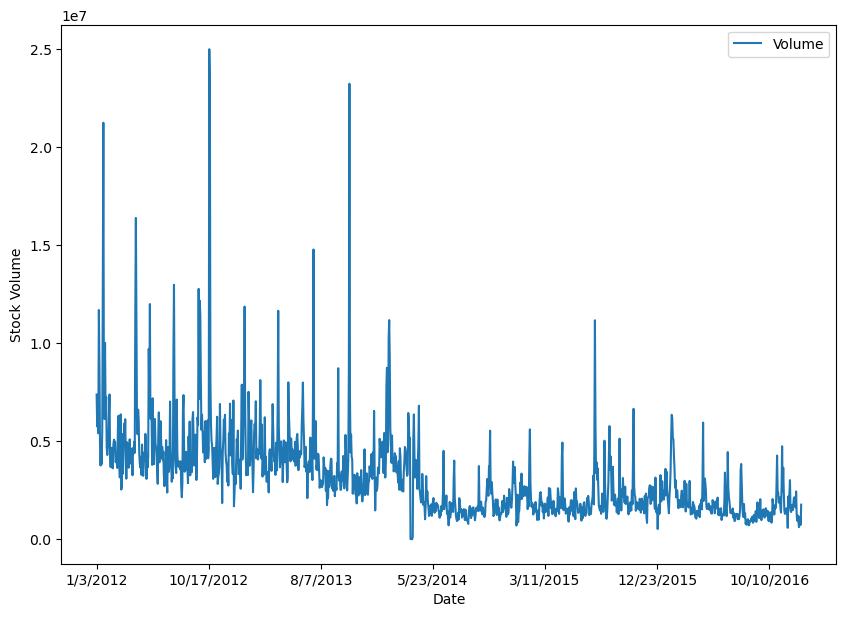

In [4]:
ax1 = data.plot(x="Date", y=["Open", "High", "Low", "Close"], figsize=(10,7),title='Open, High, Low, Close Stock Prices of Google Stocks')
ax1.set_ylabel("Stock Price")

ax2 = data.plot(x="Date", y=["Volume"],  figsize=(10,7))
ax2.set_ylabel("Stock Volume")

In [5]:
data.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

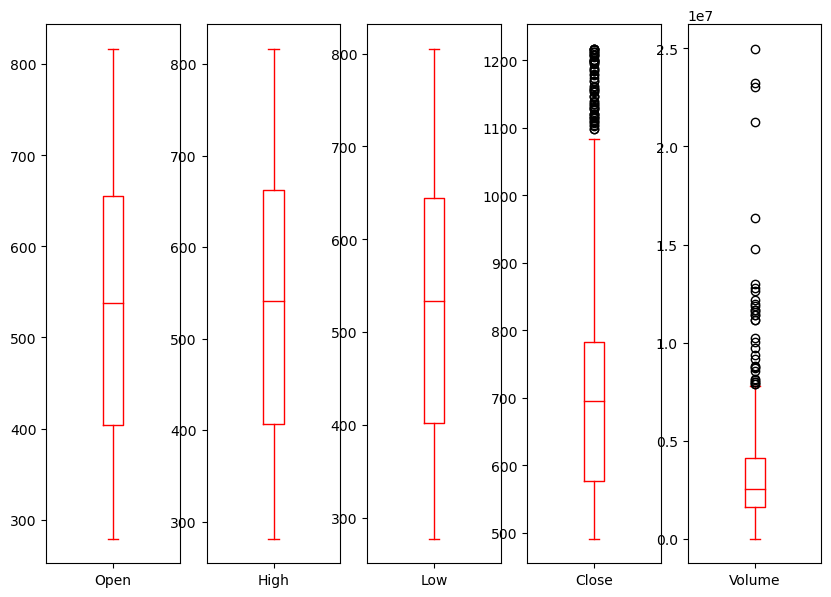

In [6]:
data[['Open','High','Low','Close','Volume']].plot(kind='box', layout=(1,5), subplots=True, sharex=False, sharey=False, figsize=(10,7),color='red')
plt.show()

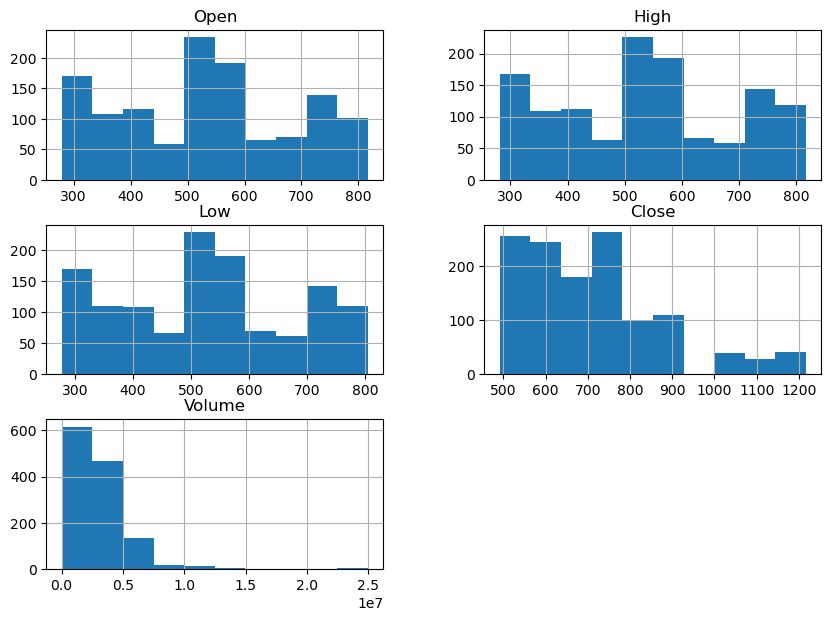

In [7]:
data.hist(figsize=(10,7))
plt.show()

In [8]:
scaler = MinMaxScaler()
data_without_date = data.drop("Date", axis=1)
scaled_data = pd.DataFrame(scaler.fit_transform(data_without_date))

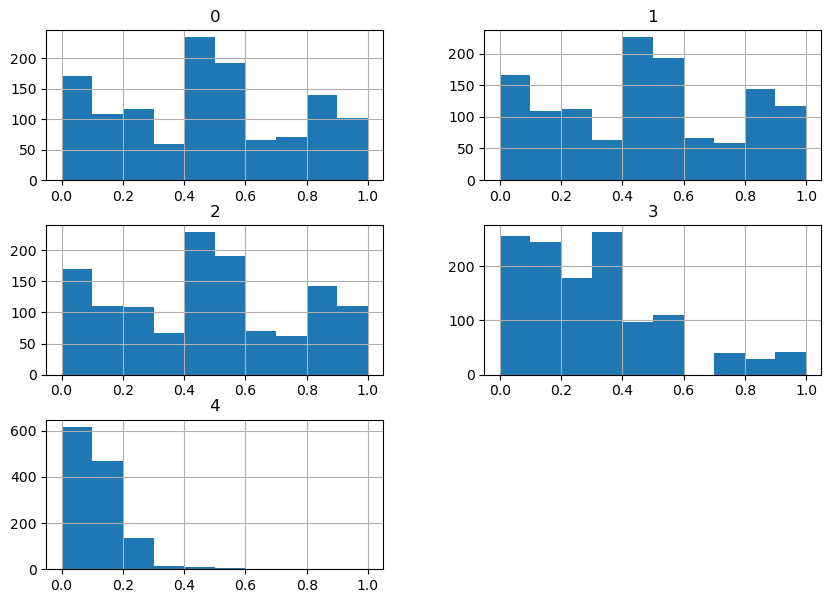

In [9]:
scaled_data.hist(figsize=(10,7))
plt.show()

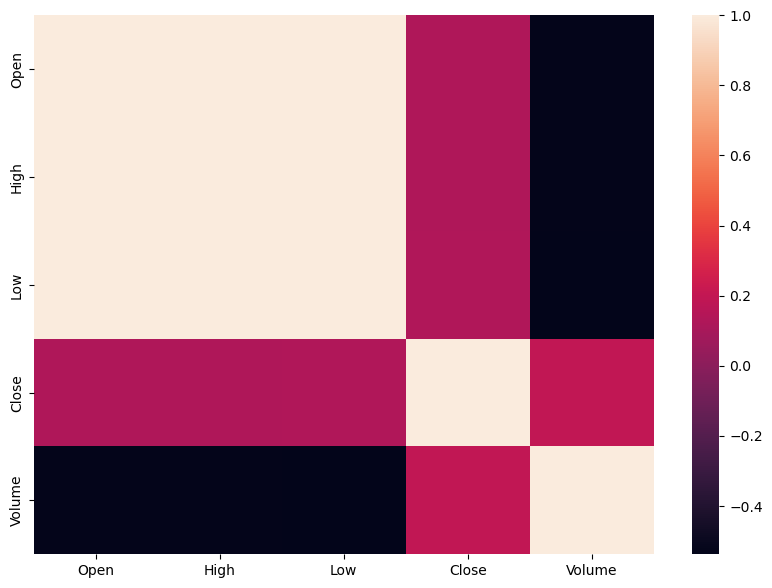

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(data.drop("Date", axis=1).corr())
plt.show()

In [11]:
scaler = MinMaxScaler()
data_without_date = data.drop("Date", axis=1)
scaled_data = pd.DataFrame(scaler.fit_transform(data_without_date))

In [12]:
scaled_data = scaled_data.drop([0, 2, 3], axis=1)
scaled_data

,1,4
0,0.096401,0.295258
1,0.098344,0.229936
2,0.092517,0.263612
3,0.088819,0.216179
4,0.076718,0.467797
...,...,...
1253,0.955292,0.024650
1254,0.964853,0.031286
1255,0.958074,0.045891
1256,0.942574,0.029491


In [13]:
def split_seq_multivariate(sequence, n_past, n_future):

    '''
    n_past ==> no of past observations
    n_future ==> no of future observations
    '''
    x = []
    y = []
    for window_start in range(len(sequence)):
        past_end = window_start + n_past
        future_end = past_end + n_future
        if future_end > len(sequence):
            break
        # slicing the past and future parts of the window (this indexing is for 2 features vala data only)
        past = sequence[window_start:past_end, :]
        future = sequence[past_end:future_end, -1]
        x.append(past)
        y.append(future)

    return np.array(x), np.array(y)

In [14]:
n_steps = 60

scaled_data = scaled_data.to_numpy()
scaled_data.shape

(1258, 2)

In [15]:
x, y = split_seq_multivariate(scaled_data, n_steps, 1)

In [16]:
x.shape, y.shape

((1198, 60, 2), (1198, 1))

In [17]:
y = y[:, 0]
y.shape


(1198,)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((958, 60, 2), (240, 60, 2), (958,), (240,))

In [19]:
model = Sequential()
model.add(LSTM(612, input_shape=(n_steps, 2)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1))

C:\Users\Tanuja\Desktop\Jupyter Notebook\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 612)                 │       1,505,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │          30,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 30)                  │           1,530 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,540,281 (5.88 MB)

 Trainable params: 1,540,281 (5.88 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [22]:
history = model.fit(x_train, y_train, epochs=250, batch_size=32, verbose=2, validation_data=(x_test, y_test))


Epoch 1/250
30/30 - 26s - 853ms/step - loss: 0.0068 - mae: 0.0508 - val_loss: 0.0060 - val_mae: 0.0422
Epoch 2/250
30/30 - 17s - 571ms/step - loss: 0.0045 - mae: 0.0377 - val_loss: 0.0054 - val_mae: 0.0436
Epoch 3/250
30/30 - 17s - 556ms/step - loss: 0.0044 - mae: 0.0376 - val_loss: 0.0051 - val_mae: 0.0402
Epoch 4/250
30/30 - 16s - 531ms/step - loss: 0.0042 - mae: 0.0362 - val_loss: 0.0050 - val_mae: 0.0379
Epoch 5/250
30/30 - 16s - 540ms/step - loss: 0.0044 - mae: 0.0384 - val_loss: 0.0046 - val_mae: 0.0415
Epoch 6/250
30/30 - 17s - 576ms/step - loss: 0.0041 - mae: 0.0356 - val_loss: 0.0045 - val_mae: 0.0379
Epoch 7/250
30/30 - 16s - 545ms/step - loss: 0.0039 - mae: 0.0341 - val_loss: 0.0044 - val_mae: 0.0357
Epoch 8/250
30/30 - 16s - 538ms/step - loss: 0.0037 - mae: 0.0336 - val_loss: 0.0043 - val_mae: 0.0429
Epoch 9/250
30/30 - 16s - 540ms/step - loss: 0.0038 - mae: 0.0352 - val_loss: 0.0043 - val_mae: 0.0356
Epoch 10/250
30/30 - 16s - 537ms/step - loss: 0.0036 - mae: 0.0332 - val_

Epoch 81/250
30/30 - 39s - 1s/step - loss: 0.0034 - mae: 0.0318 - val_loss: 0.0037 - val_mae: 0.0360
Epoch 82/250
30/30 - 34s - 1s/step - loss: 0.0032 - mae: 0.0315 - val_loss: 0.0033 - val_mae: 0.0357
Epoch 83/250
30/30 - 36s - 1s/step - loss: 0.0031 - mae: 0.0306 - val_loss: 0.0034 - val_mae: 0.0347
Epoch 84/250
30/30 - 38s - 1s/step - loss: 0.0030 - mae: 0.0308 - val_loss: 0.0038 - val_mae: 0.0355
Epoch 85/250
30/30 - 34s - 1s/step - loss: 0.0030 - mae: 0.0305 - val_loss: 0.0037 - val_mae: 0.0354
Epoch 86/250
30/30 - 34s - 1s/step - loss: 0.0031 - mae: 0.0328 - val_loss: 0.0034 - val_mae: 0.0341
Epoch 87/250
30/30 - 36s - 1s/step - loss: 0.0032 - mae: 0.0315 - val_loss: 0.0035 - val_mae: 0.0363
Epoch 88/250
30/30 - 37s - 1s/step - loss: 0.0032 - mae: 0.0316 - val_loss: 0.0035 - val_mae: 0.0350
Epoch 89/250
30/30 - 35s - 1s/step - loss: 0.0031 - mae: 0.0310 - val_loss: 0.0038 - val_mae: 0.0360
Epoch 90/250
30/30 - 35s - 1s/step - loss: 0.0032 - mae: 0.0314 - val_loss: 0.0037 - val_ma

30/30 - 28s - 930ms/step - loss: 0.0029 - mae: 0.0299 - val_loss: 0.0037 - val_mae: 0.0358
Epoch 162/250
30/30 - 29s - 982ms/step - loss: 0.0028 - mae: 0.0294 - val_loss: 0.0041 - val_mae: 0.0368
Epoch 163/250
30/30 - 30s - 985ms/step - loss: 0.0028 - mae: 0.0312 - val_loss: 0.0040 - val_mae: 0.0371
Epoch 164/250
30/30 - 33s - 1s/step - loss: 0.0027 - mae: 0.0294 - val_loss: 0.0044 - val_mae: 0.0390
Epoch 165/250
30/30 - 29s - 974ms/step - loss: 0.0027 - mae: 0.0297 - val_loss: 0.0040 - val_mae: 0.0379
Epoch 166/250
30/30 - 34s - 1s/step - loss: 0.0027 - mae: 0.0304 - val_loss: 0.0049 - val_mae: 0.0404
Epoch 167/250
30/30 - 28s - 945ms/step - loss: 0.0028 - mae: 0.0303 - val_loss: 0.0044 - val_mae: 0.0380
Epoch 168/250
30/30 - 29s - 975ms/step - loss: 0.0027 - mae: 0.0291 - val_loss: 0.0043 - val_mae: 0.0394
Epoch 169/250
30/30 - 33s - 1s/step - loss: 0.0029 - mae: 0.0305 - val_loss: 0.0044 - val_mae: 0.0403
Epoch 170/250
30/30 - 29s - 968ms/step - loss: 0.0029 - mae: 0.0321 - val_loss

Epoch 240/250
30/30 - 16s - 530ms/step - loss: 0.0013 - mae: 0.0234 - val_loss: 0.0047 - val_mae: 0.0396
Epoch 241/250
30/30 - 16s - 537ms/step - loss: 0.0015 - mae: 0.0243 - val_loss: 0.0052 - val_mae: 0.0405
Epoch 242/250
30/30 - 16s - 527ms/step - loss: 0.0016 - mae: 0.0250 - val_loss: 0.0050 - val_mae: 0.0395
Epoch 243/250
30/30 - 16s - 534ms/step - loss: 0.0016 - mae: 0.0266 - val_loss: 0.0048 - val_mae: 0.0394
Epoch 244/250
30/30 - 16s - 530ms/step - loss: 0.0014 - mae: 0.0249 - val_loss: 0.0046 - val_mae: 0.0407
Epoch 245/250
30/30 - 16s - 536ms/step - loss: 0.0011 - mae: 0.0234 - val_loss: 0.0049 - val_mae: 0.0390
Epoch 246/250
30/30 - 16s - 532ms/step - loss: 0.0013 - mae: 0.0239 - val_loss: 0.0050 - val_mae: 0.0405
Epoch 247/250
30/30 - 16s - 536ms/step - loss: 0.0024 - mae: 0.0300 - val_loss: 0.0049 - val_mae: 0.0398
Epoch 248/250
30/30 - 16s - 532ms/step - loss: 0.0025 - mae: 0.0299 - val_loss: 0.0050 - val_mae: 0.0387
Epoch 249/250
30/30 - 16s - 527ms/step - loss: 0.0021 -

<Axes: >

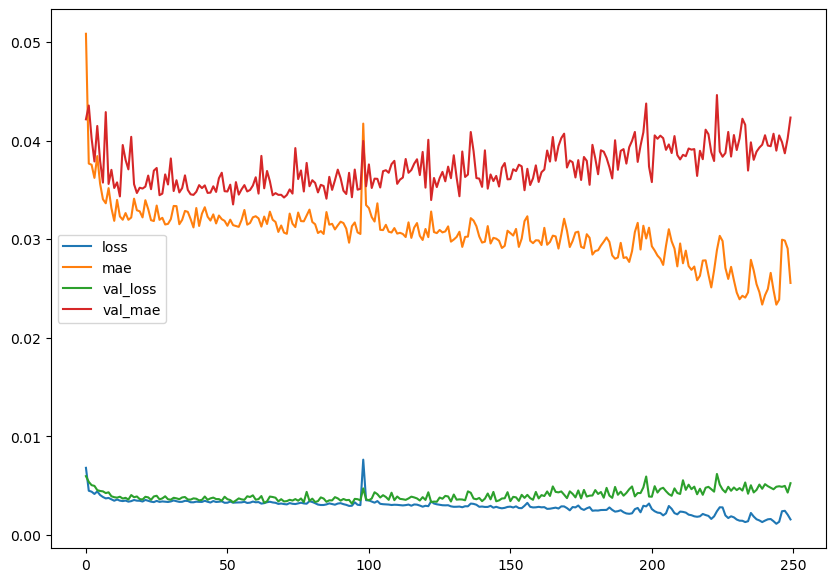

In [23]:
pd.DataFrame(history.history).plot(figsize=(10,7))

In [24]:
model.evaluate(x_test, y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - loss: 0.0047 - mae: 0.0420


[0.005259399767965078, 0.04234166070818901]

In [25]:
predictions = model.predict(x_test)
predictions.shape

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 210ms/step


(240, 1)

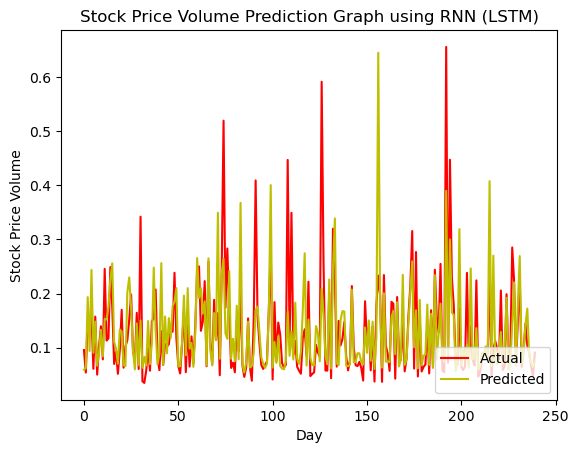

<Figure size 1000x700 with 0 Axes>

In [26]:
plt.plot(y_test, c = 'r')
plt.plot(predictions, c = 'y')
plt.xlabel('Day')
plt.ylabel('Stock Price Volume')
plt.title('Stock Price Volume Prediction Graph using RNN (LSTM)')
plt.legend(['Actual','Predicted'], loc = 'lower right')
plt.figure(figsize=(10,7))
plt.show()